In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
# Load Dataset
df = pd.read_csv("diamonds.csv")

In [ ]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
# Data Cleaning
df = df[(df[['x', 'y', 'z']] != 0).all(axis=1)]

In [ ]:
# Feature Engineering
df['volume'] = df['x'] * df['y'] * df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

<ipython-input-5-150a63de3ce0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volume'] = df['x'] * df['y'] * df['z']
<ipython-input-5-150a63de3ce0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x', 'y', 'z'], axis=1, inplace=True)


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [ ]:
# Label Encoding
label_encoders = {}
for col in ['cut', 'color', 'clarity']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-7-739f1e56de04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-7-739f1e56de04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-7-739f1e56de04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

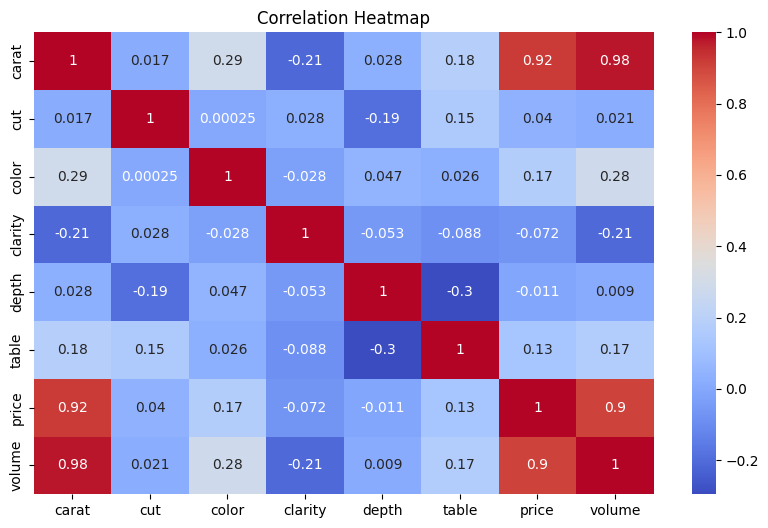

In [ ]:
# EDA
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

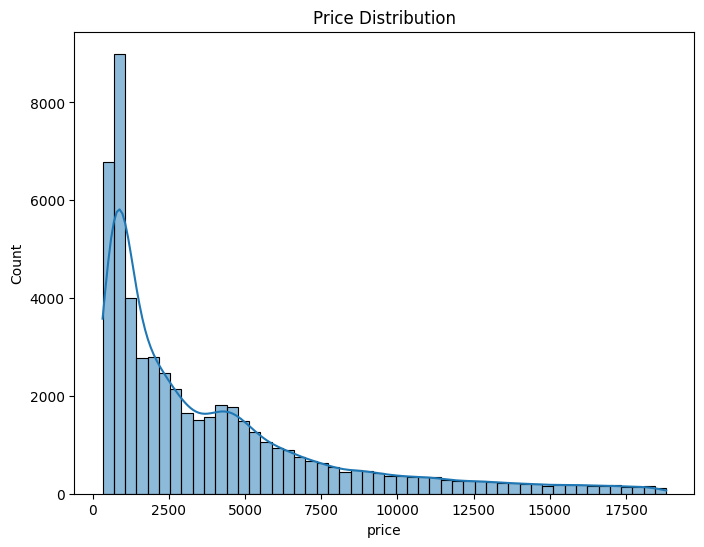

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

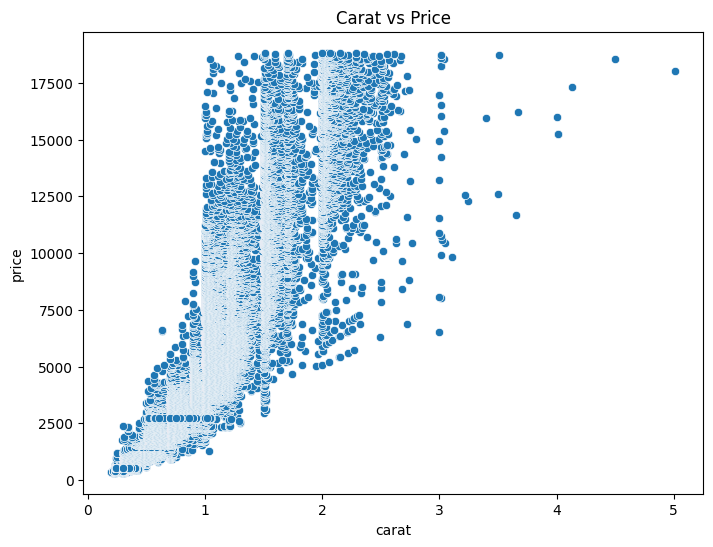

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='carat', y='price', data=df)
plt.title("Carat vs Price")
plt.show()

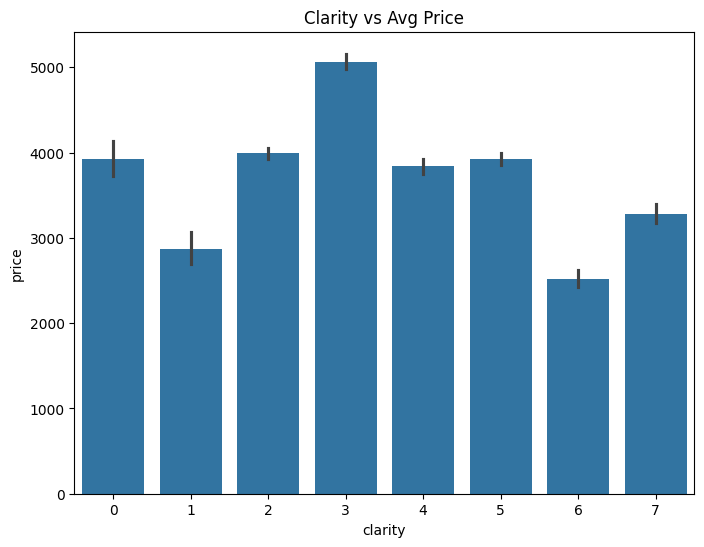

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='clarity', y='price', data=df)
plt.title("Clarity vs Avg Price")
plt.show()

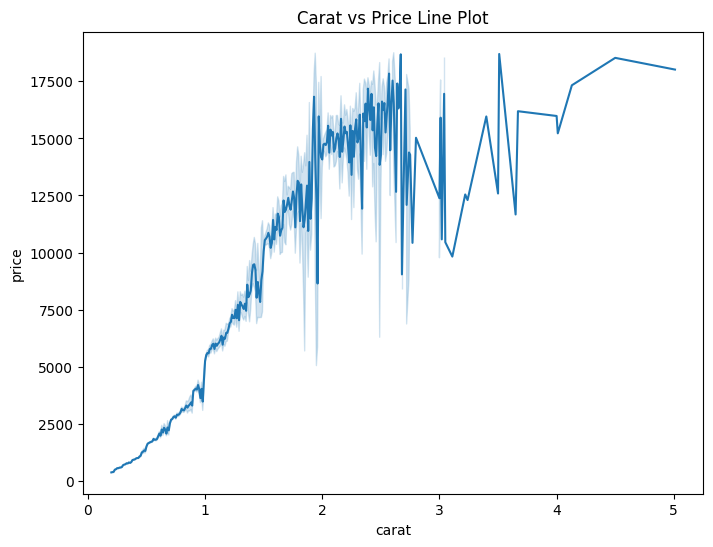

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x='carat', y='price', data=df.sort_values('carat'))
plt.title("Carat vs Price Line Plot")
plt.show()

<ipython-input-13-29730f7a97a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


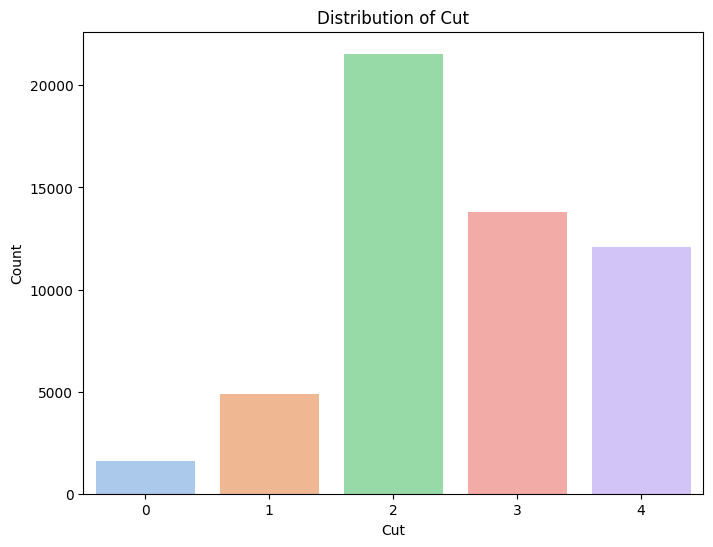

<ipython-input-13-29730f7a97a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


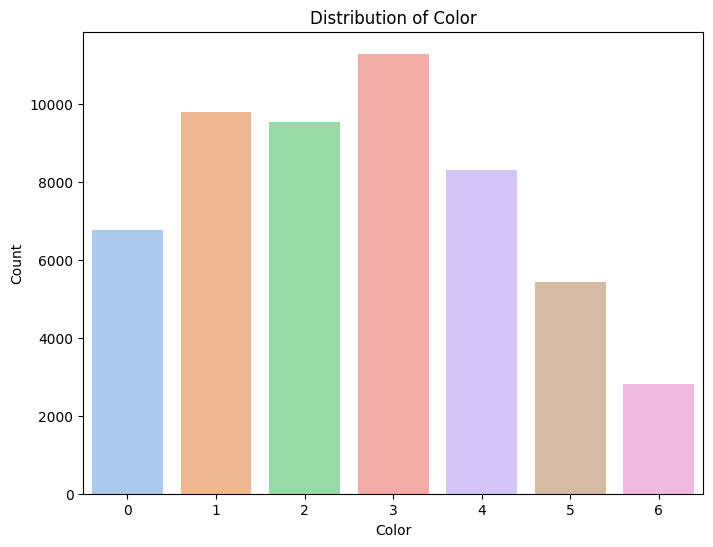

<ipython-input-13-29730f7a97a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


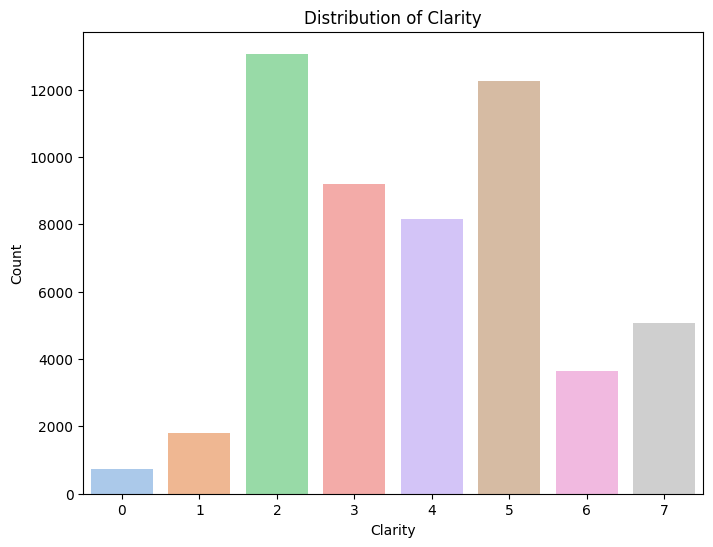

In [ ]:
# Univariate Analysis: Categorical Variables
categorical_columns = ['cut', 'color', 'clarity']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.show()

## **OUTLIER DETECTION AND CAPPING**

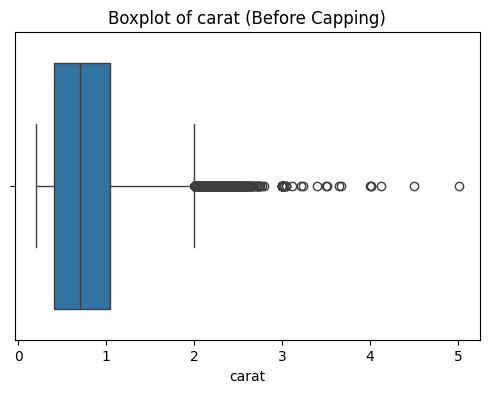

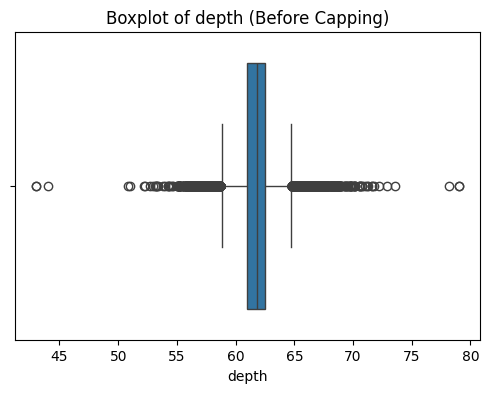

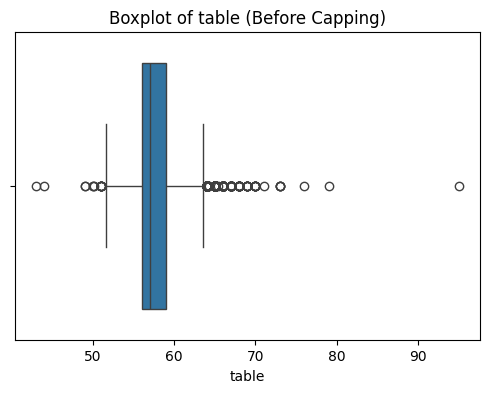

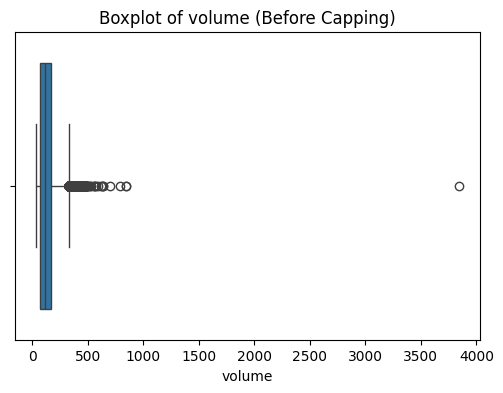

In [ ]:
# Boxplots to visualize outliers
numeric_cols = ['carat', 'depth', 'table', 'volume']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Capping)")
    plt.show()

In [ ]:
# Function to count outliers before capping
def count_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((data[col] < lower) | (data[col] > upper)).sum()

# Print outlier counts
for col in numeric_cols:
    outliers = count_outliers_iqr(df, col)
    print(f"{col}: {outliers} outliers detected")

carat: 1883 outliers detected
depth: 2543 outliers detected
table: 604 outliers detected
volume: 1323 outliers detected


In [ ]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))


In [ ]:
columns_to_cap = ['depth', 'table', 'volume']  # 'carat' intentionally skipped

for col in columns_to_cap:
    outliers = count_outliers_iqr(df, col)
    print(f"{col}: {outliers} outliers capped")
    cap_outliers_iqr(df, col)


depth: 2543 outliers capped
table: 604 outliers capped
volume: 1323 outliers capped


"We analyzed outliers for all numerical features but applied capping only to depth, table, and volume — as extreme values in these features are more likely due to noise or measurement errors. We retained outliers in price and carat, as they represent genuine high-value diamonds and are essential for accurate prediction."

In [ ]:
# Features & Target
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Column Types
numeric_features = ['carat', 'depth', 'table', 'volume']
categorical_features = ['cut', 'color', 'clarity']

In [ ]:
# Preprocessing Pipeline
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features)
], remainder='passthrough')

In [ ]:
# Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Evaluate Models
r2_scores = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[name] = r2
    print(f"{name} R² Score: {r2:.4f}")

LinearRegression R² Score: 0.8877
Ridge R² Score: 0.8877
DecisionTree R² Score: 0.9646
RandomForest R² Score: 0.9802
GradientBoosting R² Score: 0.9700
XGBoost R² Score: 0.9798


In [ ]:
# Best Model
best_model = max(r2_scores, key=r2_scores.get)
print(f"\nBest Performing Model: {best_model} with R² = {r2_scores[best_model]:.4f}")


Best Performing Model: RandomForest with R² = 0.9802


In [ ]:

import joblib

# Save the best model
model_to_save = models[best_model]
joblib.dump(model_to_save, f"{best_model}_diamond_price_model.pkl")

print(f"Model saved as {best_model}_diamond_price_model.pkl")


Model saved as RandomForest_diamond_price_model.pkl
